In [1]:
from xgb_results import xgb_results_regression
from split import split_data
from pprint import pprint
from utils import *
from get_data import get_uci_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x,y, description = get_uci_dataset(0)
pprint(description)

{'categorical features': ['Sex'],
 'dataset name': 'Abalone',
 'number of features': 10,
 'number of test examples': 4177,
 'number of training examples': 4177,
 'variables information':              name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm     

In [ ]:
x_train, x_test, y_train, y_test = split_data(x, y)
x_train, x_test, y_train, y_test = convert_to_numpy_dataset(x_train, x_test, y_train, y_test)

Number of features:  10
Number of training examples:  3341
Number of test examples:  836


In [ ]:
results = xgb_results_regression(x_train, x_test, y_train, y_test)
pprint(results)

metrics = ['MSE', 'R^2 Score', 'Pearson', 'Spearman']

{'Testing Metrics': {'MSE': 5.854122615330176,
                     'Pearson': 0.6896658315281465,
                     'R^2 Score': 0.45921394682474703,
                     'Spearman': 0.7357141578964534},
 'Training Metrics': {'MSE': 0.5618531331829442,
                      'Pearson': 0.9744020587898325,
                      'R^2 Score': 0.9453661443787925,
                      'Spearman': 0.9613619606594258}}


Sample Rate: 0.01
Sample Rate: 0.02
Sample Rate: 0.03
Sample Rate: 0.04
Sample Rate: 0.05
Sample Rate: 0.060000000000000005
Sample Rate: 0.06999999999999999
Sample Rate: 0.08
Sample Rate: 0.09
Sample Rate: 0.09999999999999999
Sample Rate: 0.11
Sample Rate: 0.12
Sample Rate: 0.13
Sample Rate: 0.14
Sample Rate: 0.15000000000000002
Sample Rate: 0.16
Sample Rate: 0.17
Sample Rate: 0.18000000000000002
Sample Rate: 0.19
Sample Rate: 0.2
Sample Rate: 0.21000000000000002
Sample Rate: 0.22
Sample Rate: 0.23
Sample Rate: 0.24000000000000002
Sample Rate: 0.25
Sample Rate: 0.26
Sample Rate: 0.27
Sample Rate: 0.28
Sample Rate: 0.29000000000000004
Sample Rate: 0.3
Sample Rate: 0.31
Sample Rate: 0.32
Sample Rate: 0.33
Sample Rate: 0.34
Sample Rate: 0.35000000000000003
Sample Rate: 0.36000000000000004
Sample Rate: 0.37
Sample Rate: 0.38
Sample Rate: 0.39
Sample Rate: 0.4
Sample Rate: 0.41000000000000003
Sample Rate: 0.42000000000000004
Sample Rate: 0.43
Sample Rate: 0.44
Sample Rate: 0.45
Sample Rate:

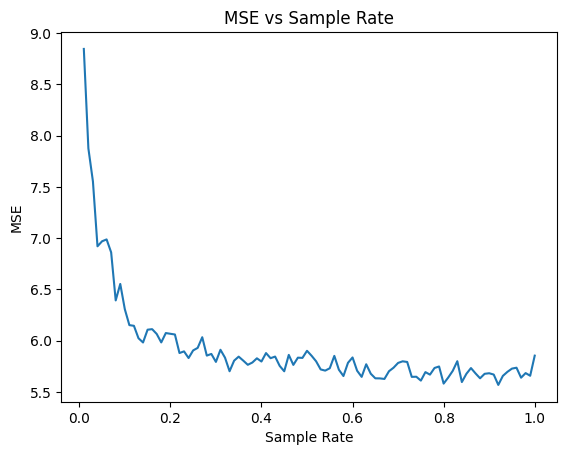

In [ ]:
# sample rates are from 0 to 1 in increments of 0.01
sample_rates = np.arange(0.01, 1.01, 0.01)
# create a dictionary for each metric
mse_dict = {}
r2_dict = {}
pearson_dict = {}
spearman_dict = {}

for index, sample_rate in enumerate(sample_rates):
    if index % 10 == 0:
        print('Sample Rate: ', sample_rate)
    for i in range (10):
        x_train_sample, y_train_sample = sample_data(x_train, y_train, sample_rate, seed = i)
        results = xgb_results_regression(x_train_sample, x_test, y_train_sample, y_test)
        test_results = results['Testing Metrics']
        if sample_rate not in mse_dict:
            mse_dict[sample_rate] = [test_results['MSE']]
        else:
            mse_dict[sample_rate].append(test_results['MSE'])

    mse_dict[sample_rate] = np.mean(mse_dict[sample_rate])



# graph mse results
plt.plot(list(mse_dict.keys()), list(mse_dict.values()))
plt.xlabel('Sample Rate')
plt.ylabel('MSE')
plt.title('MSE vs Sample Rate')
plt.show()
